# Analysis Package for Athena

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import h5py

%cd /home/vik/code/athena/vis/python

import athena_read


/home/vik/code/athena/vis/python


In [2]:
data_dir = "/home/vik/code/runs/athena_torus/"

## Choose Time

In [5]:
dump = '00300'

file_user = "fm_torus.user." + dump + ".athdf"
file_prim = "fm_torus.prim." + dump + ".athdf"

## Read in Data

In [6]:
user = athena_read.athdf(data_dir+file_user)
prim = athena_read.athdf(data_dir+file_prim)

In [7]:
hst = athena_read.hst(data_dir+'fm_torus.hst')

## Data Reduction

In [8]:
def dump_keys(d, lvl=0):
    import collections.abc
    for k in d.keys():
        if not isinstance(d[k], dict):
            if isinstance(d[k], np.ndarray):
                print(k + ": " + str(type(d[k])) + str(d[k].shape))
            else:
                print(k + ": " + str(type(d[k])))
                
        else:
            dump_keys(d[k])
    return

### Looping Through Keys to Print All Known Values

In [9]:
dump_keys(prim)
prim['Time']

Coordinates: <class 'numpy.bytes_'>
DatasetNames: <class 'numpy.ndarray'>(2,)
MaxLevel: <class 'numpy.int32'>
MeshBlockSize: <class 'numpy.ndarray'>(3,)
NumCycles: <class 'numpy.int32'>
NumMeshBlocks: <class 'numpy.int32'>
NumVariables: <class 'numpy.ndarray'>(2,)
RootGridSize: <class 'numpy.ndarray'>(3,)
RootGridX1: <class 'numpy.ndarray'>(3,)
RootGridX2: <class 'numpy.ndarray'>(3,)
RootGridX3: <class 'numpy.ndarray'>(3,)
Time: <class 'numpy.float32'>
VariableNames: <class 'numpy.ndarray'>(8,)
x1f: <class 'numpy.ndarray'>(129,)
x1v: <class 'numpy.ndarray'>(128,)
x2f: <class 'numpy.ndarray'>(129,)
x2v: <class 'numpy.ndarray'>(128,)
x3f: <class 'numpy.ndarray'>(129,)
x3v: <class 'numpy.ndarray'>(128,)
rho: <class 'numpy.ndarray'>(128, 128, 128)
press: <class 'numpy.ndarray'>(128, 128, 128)
vel1: <class 'numpy.ndarray'>(128, 128, 128)
vel2: <class 'numpy.ndarray'>(128, 128, 128)
vel3: <class 'numpy.ndarray'>(128, 128, 128)
Bcc1: <class 'numpy.ndarray'>(128, 128, 128)
Bcc2: <class 'numpy.

3.0001135

In [10]:
dump_keys(user)

Coordinates: <class 'numpy.bytes_'>
DatasetNames: <class 'numpy.ndarray'>(1,)
MaxLevel: <class 'numpy.int32'>
MeshBlockSize: <class 'numpy.ndarray'>(3,)
NumCycles: <class 'numpy.int32'>
NumMeshBlocks: <class 'numpy.int32'>
NumVariables: <class 'numpy.ndarray'>(1,)
RootGridSize: <class 'numpy.ndarray'>(3,)
RootGridX1: <class 'numpy.ndarray'>(3,)
RootGridX2: <class 'numpy.ndarray'>(3,)
RootGridX3: <class 'numpy.ndarray'>(3,)
Time: <class 'numpy.float32'>
VariableNames: <class 'numpy.ndarray'>(2,)
x1f: <class 'numpy.ndarray'>(129,)
x1v: <class 'numpy.ndarray'>(128,)
x2f: <class 'numpy.ndarray'>(129,)
x2v: <class 'numpy.ndarray'>(128,)
x3f: <class 'numpy.ndarray'>(129,)
x3v: <class 'numpy.ndarray'>(128,)
gamma: <class 'numpy.ndarray'>(128, 128, 128)
pmag: <class 'numpy.ndarray'>(128, 128, 128)


In [11]:
print(prim['VariableNames'])
print(user['RootGridSize'])

[b'rho' b'press' b'vel1' b'vel2' b'vel3' b'Bcc1' b'Bcc2' b'Bcc3']
[128 128 128]


In [12]:
rho = prim['rho']

## Defining Some Constants

In [13]:
a = 0.5
M = 1
q = 0

In [14]:
rh = M + np.sqrt(M**2 - a**2 - q**2)

## Coordinates

In [15]:
# defining number of cells in each spatial coordinate
n1 = user['RootGridSize'][0]
n2 = user['RootGridSize'][1]
n3 = user['RootGridSize'][2]

# creating 1D arrays fo r
r_  = prim['x1v']
th_ = prim['x2v']
ph_ = prim['x3v']

r = np.zeros((n1,n2,n3))
th = np.zeros((n1,n2,n3))
ph = np.zeros((n1,n2,n3))

rmax = r_[-1]
rmin = r_[0]

for j in range(n2):
    for k in range(n3):
        r[:,j,k] = r_
        
for i in range(n1):
    for k in range(n3):
        th[i,:,k] = th_        

for i in range(n1):
    for j in range(n2):
        ph[i,j,:] = ph_

x = r[:,:,0]*np.sin(th[:,:,0])
y = r[:,:,0]*np.cos(th[:,:,0])

## Plotting

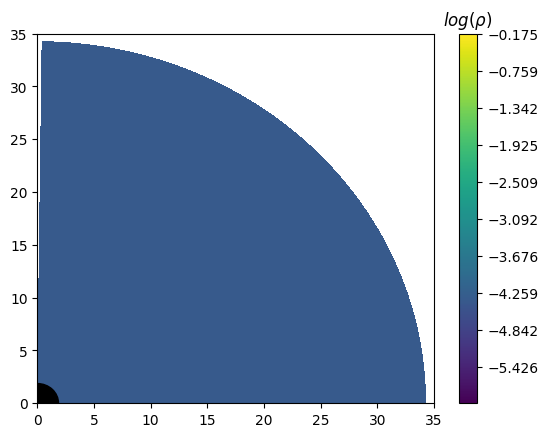

In [20]:
fmin = np.percentile(np.log10(rho), 1)
fmax = np.percentile(np.log10(rho), 99)
levels = np.linspace(fmin,fmax,500)

fig, ax = plt.subplots()
CS = ax.contourf(x, y, np.log10(rho[:,:,0]), levels = levels)

ax.set_xlim(0,35)
ax.set_ylim(0,35)

cbar = fig.colorbar(CS)
cbar.ax.set_title(r'$log(\rho)$')

circle1 = plt.Circle((0, 0), rh, color ='black')
ax.add_patch(circle1)